# Random Forest

- **랜덤포레스트(Random Forest)** 는 **Bagging**기반의 앙상블 기법중 하나로, **Boostrap Sampling**을 통해 여러개의 의사결정나무(베이스모델)를 생성한 후에 다수결 또는 평균에 따라 출력변수를 예측함
    - **Bootstrap Sampling** : 학습 데이터로부터 원하는 크기의 샘플을 복원추출하여 샘플데이터를 구축하는 방법
    - **Bagging** : Boostrap Aggregating의 약자로, Bootstrap Sampling을 통해 여러개의 표본을 만들고, 각 표본으로부터 베이스 모델을 형성하여 이를 결합하는 앙상블 기법
  
- 붓스트램 샘플링 뿐만아니라, **무작위 변수선택 기법**을 사용하여 의사결정나무의 다양성을 확보 한다.
- **변수의 중요도**를 파악 할 수 있기때문에 공정에서 혐의인자 관리용으로 유용하게 사용 가능한 앙상블 기법


### 1. 데이터 로드 및 전처리

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib
#한글꺠짐 방지
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [7]:
data=pd.read_csv("./data/class_balance.csv",encoding="EUC-KR")

In [8]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X466,X467,X468,X469,X470,X471,X472,X473,X474,Y
0,0.457896,0.530189,0.276976,0.359864,0.193059,0.322190,0.706897,0.553781,0.653894,0.375204,...,0.246376,0.711806,0.008532,0.013672,0.008467,0.402240,0.238811,0.274876,0.210238,-1
1,0.607100,0.341478,0.518992,0.395300,0.042071,0.469654,0.750000,0.542031,0.447466,0.189233,...,0.523785,0.760417,0.030930,0.033203,0.029759,0.210356,0.309339,0.328358,0.439175,-1
2,0.360781,0.369653,0.341039,0.021697,0.181737,0.528684,0.491379,0.516722,0.300371,0.376835,...,0.185769,0.659722,0.005333,0.003906,0.005311,0.381877,0.208171,0.208955,0.155761,-1
3,0.460910,0.413500,0.535685,0.302794,0.242326,0.408966,0.646552,0.561615,0.415328,0.313214,...,0.246376,0.000000,1.000000,1.000000,1.000000,0.381877,0.208171,0.208955,0.155761,-1
4,0.263068,0.279821,0.535685,0.302794,0.242326,0.408966,0.646552,0.638747,0.660074,0.520392,...,0.110711,0.517361,0.023677,0.022461,0.023447,0.608414,0.212062,0.268657,0.092827,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0.360022,0.396033,0.382803,0.070771,0.143308,0.920884,0.586207,0.636336,0.337454,0.432300,...,0.000000,0.597222,0.016212,0.013672,0.015997,0.045307,0.147860,0.171642,0.000000,1
250,0.508628,0.437628,0.192378,0.061866,0.168425,0.481919,0.715517,0.270563,0.407911,0.336052,...,0.132582,0.975694,0.017065,0.015625,0.016114,0.543689,0.227626,0.320896,0.111165,1
251,0.275930,0.364365,0.302236,0.376615,0.485135,0.627270,0.594828,0.435673,0.420272,0.367047,...,0.246376,0.586806,0.008532,0.015625,0.008613,0.343042,0.151751,0.164179,0.143012,1
252,0.785179,0.271804,0.400189,0.457851,0.229526,0.244320,0.396552,0.875565,0.110012,0.337684,...,0.221768,0.767361,0.024317,0.019531,0.023461,0.509709,0.398833,0.440299,0.185945,1


In [9]:
#X,Y 분할
Y=data["Y"].copy()
X=data.drop("Y",axis=1)
X.head(3)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2,shuffle =True)

[[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)]  
**sklearn.model_selection.train_test_split**
- **test_size** : float or int, default = 0.25, 정수값일시 test사이즈로 설정하고 싶은 샘플 수 입력
- **train_size** : float or int, default = None
- **random_state** : int, default = None, 랜덤 seed값 설정, 같은 seed 내에선 동일결과 추출 
- **shuffle** : bool, default = True, 데이터셋 무작위 추출, 시계열 데이터와 같이 순차적 추출이 필요한 경우엔 Shuffle = False!
- **stratify** : array-like, default = None, True일시 계층적 샘플링 진행 ([참고](https://www.investopedia.com/terms/stratified_random_sampling.asp))

### 2. 평가 지표 함수

![Confusion Matrix](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg)

###### 이미지 출처 : https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html

In [10]:
# 평가 지표 출력 함수
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix

def print_all_reg(Y_test,pred):
    # Specificity를 구하기 위해 confusion matrix를 이용
    cm1 = confusion_matrix(Y_test,pred)
    specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    
    #결과 검사
    #recall = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    #pre = cm1[1,1]/(cm1[1,1]+cm1[0,1])

    G_mean = recall_score(Y_test,pred) * specificity1
    
    print("model의 recall 값은 {:.3f}".format(recall_score(Y_test,pred)))
    print("model의 2종 오류 확률 값은 {:.3f}".format(1-recall_score(Y_test,pred)))
    print("model의 Specificity 값은 {:.3f}".format(specificity1))
    print("model의 1종 오류 확률 값은 {:.3f}".format(1-specificity1))
    print("model의 precision 값은 {:.3f}".format(precision_score(Y_test,pred)))
    print("model의 f1_score 값은 {:.3f}".format(f1_score(Y_test,pred)))
    print("model의 G-mean 값은 {:.3f}".format(np.sqrt(G_mean)))
    print("model의 accuracy 값은 {:.3f}".format(accuracy_score(Y_test,pred)))


### 3. 모델 학습 및 예측 (하이퍼 파라미터 default)

[[RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)]         
**주요 하이퍼파라미터** 
- **n_estimators** : int, default=100, 랜덤포레스트를 구성하는 의사결정 나무 개수 
- **criterion** : {"gini", "entorpy", "log_loss"}, default = "gini", 클래스 동질성을 측정하는 지표 설정, CART에서는 지니불순도(Gini Impurity)를 사용함.
- **max_depth** : int, default = None, 각 트리의 최대깊이를 설정. 값이 클수록 모델의 복잡도가 올라간다.
- **min_samples_split** : int or float, default = 2, 자식노드를 분할하는데 필요한 최소 샘플의 수
- **min_samples_leaf** : int or float, default = 1, leaf node에서 필요한 최소 샘풀수이며, 너무 적을 시 과적합 발생
- **max_leaf_nodes** : int, default=None, 최대 leaf node 수 제한
- **max_features** : int, float or {“auto”, “sqrt”, “log2”}, default=sqrt, 각 노드를 분리할 때 사용 할 최대 속성 수
- **bootstrap** : bool, default = True, Tree를 형성할때 붓스트램 샘플을 활용. False일시, 중복을 허용하지 않음(=pasting)
- **n_jobs** : int, deafult = None, 학습과정에서 사용할 컴퓨터 코어 수, -1로 설정시 가능한 모든 컴퓨터 코어 사용
- **random_state** : int, deafult = None, 랜덤값을 지정함으로써 동일결과 출력되도록 설정. default로 사용 시 매번 다른 forest가 형성되나 n_estimators 값이 커질수록 그 변동성은 작아짐

In [11]:
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier(random_state=0, n_jobs=-1)
rfc_model.fit(X_train,Y_train)

rfc_pred_train = rfc_model.predict(X_train) # 훈련데이터를 활용하여, 학습한 모델로 예측값 생성
rfc_pred=rfc_model.predict(X_test) # 테스트 데이터를 활용하여, 학습한 모델로 예측값 생성

print_all_reg(Y_train,rfc_pred_train) # 훈련데이터셋을 활용한 모델 성능 평가
print("")
print_all_reg(Y_test,rfc_pred) # 테스트 데이터셋을 활용한 모델 성능 평가

model의 recall 값은 1.000
model의 2종 오류 확률 값은 0.000
model의 Specificity 값은 1.000
model의 1종 오류 확률 값은 0.000
model의 precision 값은 1.000
model의 f1_score 값은 1.000
model의 G-mean 값은 1.000
model의 accuracy 값은 1.000

model의 recall 값은 0.733
model의 2종 오류 확률 값은 0.267
model의 Specificity 값은 0.979
model의 1종 오류 확률 값은 0.021
model의 precision 값은 0.957
model의 f1_score 값은 0.830
model의 G-mean 값은 0.847
model의 accuracy 값은 0.883


In [19]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid

# 데이터 전처리 및 랜덤포레스트 모델 학습과정을 자동화 하는 함수
def auto_randomforest(data_x,data_y,model,scaler_how,params):
    
    # 데이터 split
    split_num = 5 # k값 설정
    kfold = KFold(n_splits=split_num, shuffle=True, random_state=10) # K-fold 교차검증 적용
    score = []
    for train_index,test_index in kfold.split(data_x): # k-fold 결과 인덱스가 반환되어 데이터 분할 가능
        train_x,valid_x = data_x.iloc[train_index],data_x.iloc[test_index] # data_x를 훈련용, 검증용 데이터셋으로 분할
        train_y,valid_y = data_y.iloc[train_index],data_y.iloc[test_index] # data_y를 훈련용, 검증용 데이터셋으로 분할
        
        # 1 .model select 
        if model == "rf":
            
            #2. params를 통해 하이퍼 파라미터 세팅
            model_use = RandomForestClassifier(random_state=0, n_estimators = params['n_estimators'],
                                               max_depth = params["max_depth"],min_samples_leaf = params["min_samples_leaf"],
                                               min_samples_split = params["min_samples_split"]
                                              )      
        else:
            print("모델이 존재하지 않습니다.")
            break
        
        # 3. Scaling 
        if scaler_how == "minmax":
            print("minmax")
            scaler = MinMaxScaler()
            train_x = scaler.fit_transform(train_x) # 훈련용 데이터 MinMax Scaler 학습
            valid_x = scaler.transform(valid_x) # 앞서 학습한 Scaler로 검증용 데이터 스케일링, 검증 데이터셋에는 fit_transform 하지 않도록 주의
        elif scaler_how == "zscore":
            print("z변환")
            scaler2 = StandardScaler()
            train_x = scaler2.fit_transform(train_x) # 훈련용 데이터 Standard Scaler 학습
            valid_x = scaler2.transform(valid_x) # 앞서 학습한 Scaler로 검증용 데이터 스케일링 검증 데이터셋에는 fit_transform 하지 않도록 주의     
        else:
            print("해당하는 스케일러가 없습니다.")
            #print("스케일링 변환 X")
            
        # 4. FIT & TEST
        model_use.fit(train_x, train_y) # 훈련용 데이터로 랜덤포레스트 모델학습
        valid_pred = model_use.predict(valid_x) # 검증용데이터로 예측값 생성
        tem = f1_score(valid_pred,valid_y) # 성능평가
        score.append(tem) # 결과점수 저장, 해당 과정을 k번 반복
    total_score = np.mean(score) # k번 검증된 결과의 평균 출력
    print("%s 모델 K-fold 결과 f1_score: %f "%(model,total_score))

    return total_score


참고 : [K-fold 교차검증](https://jonsyou.tistory.com/23), [fit_transform과 transform의 차이](https://deepinsight.tistory.com/165)

In [28]:
# 원하는 파라미터 설정 (파라미터를 추가하려면 위의 함수에도 추가해줘야함.)
params={
    "n_estimators":[500,1000],
    "max_depth":[4,6,8,10],
    "min_samples_leaf" : [2, 4, 6],
    "min_samples_split" : range(2,8,2)
}

# ParameterGrid 통해서 모든 경우의 수 만들기 
params_list = list(ParameterGrid(params)) # 총 72가지 경우의수가 담긴 리스트 반환

# Grid search 진행
score_list = []
for params2 in params_list:
    tem = auto_randomforest(X_train,Y_train,'rf',"zscore",params2) # StandardScaler를 적용하여 랜덤포레스트 모델 학습
    score_list.append(tem)

# BEST SCORE 계산
best_index= np.argmax(score_list)
print("BEST SCORE", score_list[best_index])
print("BEST PARAMS", params_list[best_index])

z변환
z변환
z변환
z변환
z변환
rf 모델 K-fold 결과 f1_score: 0.755844 
z변환
z변환
z변환
z변환
z변환
rf 모델 K-fold 결과 f1_score: 0.763463 
z변환
z변환
z변환
z변환
z변환
rf 모델 K-fold 결과 f1_score: 0.755844 
z변환
z변환
z변환
z변환
z변환
rf 모델 K-fold 결과 f1_score: 0.763463 
z변환
z변환
z변환
z변환
z변환
rf 모델 K-fold 결과 f1_score: 0.747879 
z변환
z변환
z변환
z변환
z변환
rf 모델 K-fold 결과 f1_score: 0.761222 
z변환
z변환
z변환
z변환
z변환
rf 모델 K-fold 결과 f1_score: 0.736169 
z변환
z변환
z변환
z변환
z변환
rf 모델 K-fold 결과 f1_score: 0.722987 
z변환
z변환
z변환
z변환
z변환
rf 모델 K-fold 결과 f1_score: 0.736169 
z변환
z변환
z변환
z변환
z변환
rf 모델 K-fold 결과 f1_score: 0.722987 
z변환
z변환
z변환
z변환
z변환
rf 모델 K-fold 결과 f1_score: 0.736169 
z변환
z변환
z변환
z변환
z변환
rf 모델 K-fold 결과 f1_score: 0.722987 
z변환
z변환
z변환
z변환
z변환
rf 모델 K-fold 결과 f1_score: 0.728801 
z변환
z변환
z변환
z변환
z변환
rf 모델 K-fold 결과 f1_score: 0.728801 
z변환
z변환
z변환
z변환
z변환
rf 모델 K-fold 결과 f1_score: 0.728801 
z변환
z변환
z변환
z변환
z변환
rf 모델 K-fold 결과 f1_score: 0.728801 
z변환
z변환
z변환
z변환
z변환
rf 모델 K-fold 결과 f1_score: 0.728801 
z변환
z변환
z변환
z변환
z변환
rf 모델 K-fold 결과 f1_score: 0.

In [ ]:
params_list[best_index]

In [29]:
# 최적의 하이퍼 파라미터로 모델학습
clf = RandomForestClassifier(random_state=1, n_estimators = 500,
                                               ccp_alpha = 0.04,
                                              )  
clf.fit(X_train,Y_train)

preds_train = clf.predict(X_train)
preds = clf.predict(X_test)

print_all_reg(Y_train,preds_train)
print(" ")
print_all_reg(Y_test,preds)

model의 recall 값은 0.824
model의 2종 오류 확률 값은 0.176
model의 Specificity 값은 1.000
model의 1종 오류 확률 값은 0.000
model의 precision 값은 1.000
model의 f1_score 값은 0.904
model의 G-mean 값은 0.908
model의 accuracy 값은 0.927
 
model의 recall 값은 0.667
model의 2종 오류 확률 값은 0.333
model의 Specificity 값은 0.979
model의 1종 오류 확률 값은 0.021
model의 precision 값은 0.952
model의 f1_score 값은 0.784
model의 G-mean 값은 0.808
model의 accuracy 값은 0.857


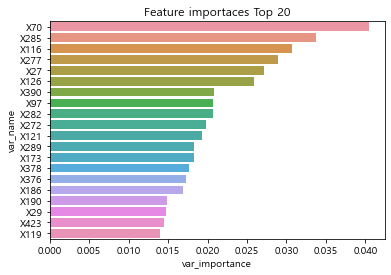

In [30]:
#주요 변수 확인
import matplotlib.pyplot as plt
import seaborn as sns
var_imp = pd.DataFrame({'var_name':X.columns , 'var_importance': clf.feature_importances_}) # 변수명과 해당 변수의 중요도 값을 데이터프레임 형태로 생성
imp_top20=var_imp.sort_values(by=['var_importance'],ascending=False)[:20] # 결과값 내림차순 정렬
imp_top20.head(n=10) # 상위값 10개만 출력
plt.figure
plt.title("Feature importaces Top 20")
sns.barplot(x=imp_top20["var_importance"], y=imp_top20["var_name"])
plt.show()